<a href="https://colab.research.google.com/github/mihirahuja1/FakeTweetsPrediction/blob/master/Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author - Mihir Ahuja

Data Citation - https://www.kaggle.com/c/nlp-getting-started

Other Citation - Citaion For  https://www.kaggle.com/ratan123/start-from-here-disaster-tweets-eda-basic-model (Snippets used)

Setup

In [237]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
import collections
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



True

Reading the data

In [203]:
train = pd.read_csv('/content/drive/My Drive/TweetPrediction/train.csv')
test = pd.read_csv('/content/drive/My Drive/TweetPrediction/test.csv')

In [204]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [205]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


Citation

In [206]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

def removeurl(raw_text):
    clean_text = re.sub(r'^https?:\/\/.*[\r\n]*', '', raw_text, flags=re.MULTILINE)
    return clean_text



End of citation

In [207]:
train['text'] = train['text'].apply(lambda x: cleanhtml(x))
test['text'] = test['text'].apply(lambda x: cleanhtml(x))

train['text'] = train['text'].apply(lambda x:removeurl(x))
test['text'] = test['text'].apply(lambda x: removeurl(x))

In [250]:
train['text'] = train['text'].map(lambda x: re.sub(r'\W+', ' ', x))
test['text'] = test['text'].map(lambda x: re.sub(r'\W+', ' ', x))


In [209]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


#Distributio of Target Column

In [210]:
fig = px.bar(train.groupby('target')['target'].count().reset_index(name='count'), x='target', y='count',color='target')
fig.show()

Tweet count grouped by location

In [211]:
data = train.groupby('location')['location'].count().reset_index(name='count').sort_values(by='count',ascending=False)

In [212]:
data = data.head(20)

In [213]:
fig = px.bar(data, x='location', y='count',color='location')
fig.show()

Tweets distribution per location

In [214]:
data = train.groupby(['location','target'])['location'].count().reset_index(name='count').sort_values(by='count',ascending=False)

In [215]:
data = data.head(20)

In [216]:
fig = px.bar(data, x="location", y='count',color='target')
fig.show()

Word Cloud

In [217]:

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


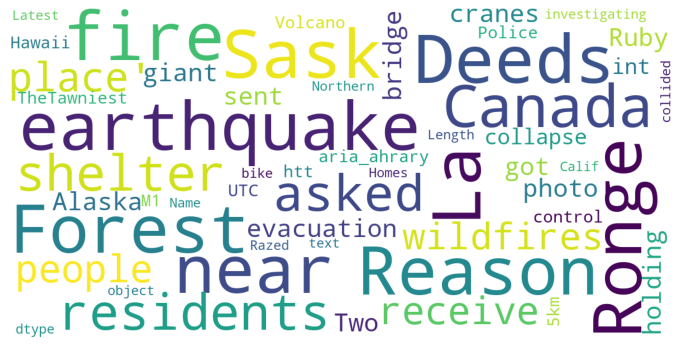

In [218]:
show_wordcloud(train[train['target']==1]['text'])

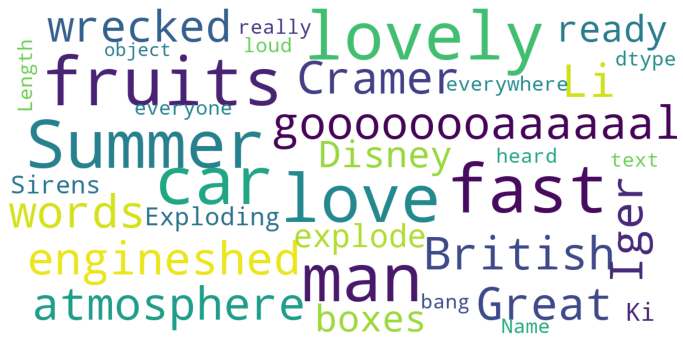

In [219]:
show_wordcloud(train[train['target']==0]['text'])

- Evident from word cloud that words belonging to different targets differ greatly

- Words Occuring in Target class 1
  - Fire 
  - Earthquake
  - people
  - Shelter
  - evacuation

- Words Occuring in Target class 0
  - Summer
  - fruits
  - lovely
  - Disney

Word Frequency 

In [220]:
data = train[train['target']==1].text.str.split(expand=True).stack().value_counts().reset_index(name='count')

In [221]:
data

,index,count
0,the,1043
1,in,1023
2,of,882
3,a,725
4,to,705
...,...,...
15996,overcharging,1
15997,http://t.co/Q0X7e84R4e,1
15998,@ahhtheenikki,1
15999,Somalia,1


In [222]:
fig = px.bar(data.head(50), x="count", y="index", orientation='h',color_discrete_sequence=px.colors.qualitative.Light24)
fig.show()

In [223]:
data = train[train['target']==0].text.str.split(expand=True).stack().value_counts().reset_index(name='count')

In [224]:
fig = px.bar(data.head(50), x="count", y="index", orientation='h',color_discrete_sequence=px.colors.qualitative.Light24)
fig.show()

Bi-Grams Count

In [251]:
counts = collections.Counter()
for sent in train[train['target']==1]['text']:
    words = nltk.word_tokenize(sent)
    counts.update(nltk.bigrams(words))

In [252]:
data = pd.DataFrame.from_dict(counts, orient='index').reset_index()

In [253]:
data = data.sort_values(by=0,ascending=False)

In [254]:
data.columns = ['Bi-gram','Count']

In [255]:
data['Bi-gram'] = data['Bi-gram'].astype(str)
data['Count'] = data['Count'].astype(int)

In [256]:
fig = px.bar(data.head(50), x="Count", y="Bi-gram", orientation='h',color_discrete_sequence=px.colors.qualitative.Light24)
fig.show()

In [258]:
counts = collections.Counter()
for sent in train[train['target']==0]['text']:
    words = nltk.word_tokenize(sent)
    counts.update(nltk.bigrams(words))
data = pd.DataFrame.from_dict(counts, orient='index').reset_index()
data = data.sort_values(by=0,ascending=False)
data.columns = ['Bi-gram','Count']
data['Bi-gram'] = data['Bi-gram'].astype(str)
data['Count'] = data['Count'].astype(int)
fig = px.bar(data.head(70), x="Count", y="Bi-gram", orientation='h',color_discrete_sequence=px.colors.qualitative.Light24)
fig.show()